In [32]:
import pygmsh
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Polygon

Mesh test:

In [46]:
with pygmsh.geo.Geometry() as geom:
    geom.add_polygon(
        [
            [0.0, 0.0],
            [1.0, -0.2],
            [1.1, 1.2],
            [0.1, 0.7],
        ],
        mesh_size=0.5,
    )
    mesh = geom.generate_mesh()

In [47]:
points = mesh.points
lines, triangles, vertices = mesh.cells

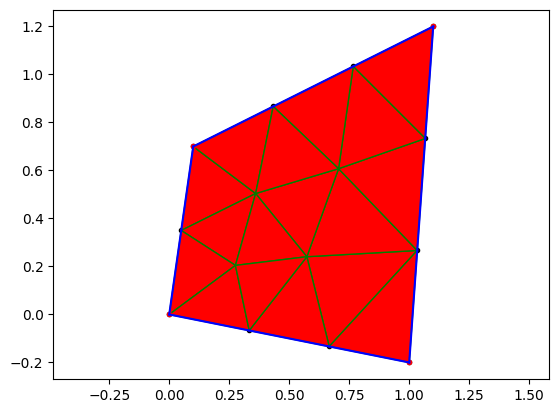

In [48]:
plt.scatter(points[:,0],points[:,1], marker='.', color='k')
for vertex in vertices.data:
    p, = vertex
    p_x, p_y, _ = points[p]    
    plt.plot([p_x],[p_y],'.r')

for line in lines.data:
    p, q = line
    p_x, p_y, _ = points[p]
    q_x, q_y, _ = points[q]
    plt.plot([p_x,q_x],[p_y,q_y],'-b')

for triangle in triangles.data:
    p, q, r = triangle
    p_x, p_y, _ = points[p]
    q_x, q_y, _ = points[q]
    r_x, r_y, _ = points[r]
    plt.gca().add_patch(Polygon([[p_x, p_y], [q_x, q_y], [r_x, r_y]], facecolor='red', edgecolor='green', fill=True))

plt.gca().axis('equal')
plt.show()

In [33]:
np.max(triangles.data)

169

{}